___
## <center><a id=0 style='color:red'>Импорт библиотек</a>

In [1]:
from ds_nms import utils_io, model_train, model_tune, model_tune_params

import pandas as pd
import joblib
import numpy as np

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    PassiveAggressiveRegressor,
    LassoLars,
    BayesianRidge,
    HuberRegressor,
    QuantileRegressor,
    RANSACRegressor,
    TheilSenRegressor,
    PoissonRegressor,
    TweedieRegressor,
    ARDRegression,
    SGDRegressor,
    ElasticNet,
)
from sklearn.svm import SVR
from sklearn.ensemble import (
    RandomForestRegressor,
    HistGradientBoostingRegressor,
    IsolationForest,
    GradientBoostingRegressor,
    StackingRegressor,
    ExtraTreesRegressor,
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

np.set_printoptions(suppress=True, precision=2)
pd.set_option("display.max_rows", 300)
pd.set_option("display.max_columns", 300)
np.random.seed(1)

___
## <center><a id=1 style='color:red'>Импорт датасета</a>
 [К описанию](#99)

In [2]:
DIR = 'train'
train_data = utils_io.load_data(sub_dir=DIR)

Файл data/train/target_train_1.pkl успешно загружен.
Файл data/train/target_train_2.pkl успешно загружен.
Файл data/train/target_train_3.pkl успешно загружен.
Файл data/train/X_train_1.pkl успешно загружен.
Файл data/train/X_train_2.pkl успешно загружен.
Файл data/train/X_train_3.pkl успешно загружен.


In [3]:
DIR = 'test/'
test_data = utils_io.load_data( sub_dir=DIR )

Файл data/test//target_test_1.pkl успешно загружен.
Файл data/test//target_test_2.pkl успешно загружен.
Файл data/test//target_test_3.pkl успешно загружен.
Файл data/test//X_test_1.pkl успешно загружен.
Файл data/test//X_test_2.pkl успешно загружен.
Файл data/test//X_test_3.pkl успешно загружен.


In [4]:
DIR = 'train_std/'

train_std_data = utils_io.load_data( sub_dir=DIR )

Файл data/train_std//target_train_1.pkl успешно загружен.
Файл data/train_std//target_train_2.pkl успешно загружен.
Файл data/train_std//target_train_3.pkl успешно загружен.
Файл data/train_std//X_train_std_1.pkl успешно загружен.
Файл data/train_std//X_train_std_2.pkl успешно загружен.
Файл data/train_std//X_train_std_3.pkl успешно загружен.


In [5]:
DIR = 'test_std/'
test_std_data = utils_io.load_data( sub_dir=DIR )

Файл data/test_std//target_test_1.pkl успешно загружен.
Файл data/test_std//target_test_2.pkl успешно загружен.
Файл data/test_std//target_test_3.pkl успешно загружен.
Файл data/test_std//X_test_std_1.pkl успешно загружен.
Файл data/test_std//X_test_std_2.pkl успешно загружен.
Файл data/test_std//X_test_std_3.pkl успешно загружен.


____

In [6]:
DIR = 'train_corr/'

train_corr_data = utils_io.load_data( sub_dir=DIR )

Файл data/train_corr//target_train_1.pkl успешно загружен.
Файл data/train_corr//target_train_2.pkl успешно загружен.
Файл data/train_corr//target_train_3.pkl успешно загружен.
Файл data/train_corr//X_train_corr_1.pkl успешно загружен.
Файл data/train_corr//X_train_corr_2.pkl успешно загружен.
Файл data/train_corr//X_train_corr_3.pkl успешно загружен.


In [7]:
DIR = 'test_corr/'

test_corr_data = utils_io.load_data( sub_dir=DIR )

Файл data/test_corr//target_test_1.pkl успешно загружен.
Файл data/test_corr//target_test_2.pkl успешно загружен.
Файл data/test_corr//target_test_3.pkl успешно загружен.
Файл data/test_corr//X_test_corr_1.pkl успешно загружен.
Файл data/test_corr//X_test_corr_2.pkl успешно загружен.
Файл data/test_corr//X_test_corr_3.pkl успешно загружен.


In [8]:
DIR = 'train_mm/'

train_mm_data = utils_io.load_data( sub_dir=DIR )

Файл data/train_mm//target_train_1.pkl успешно загружен.
Файл data/train_mm//target_train_2.pkl успешно загружен.
Файл data/train_mm//target_train_3.pkl успешно загружен.
Файл data/train_mm//X_train_mm_1.pkl успешно загружен.
Файл data/train_mm//X_train_mm_2.pkl успешно загружен.
Файл data/train_mm//X_train_mm_3.pkl успешно загружен.


In [9]:
DIR = 'test_mm/'

test_mm_data = utils_io.load_data( sub_dir=DIR )

Файл data/test_mm//target_test_1.pkl успешно загружен.
Файл data/test_mm//target_test_2.pkl успешно загружен.
Файл data/test_mm//target_test_3.pkl успешно загружен.
Файл data/test_mm//X_test_mm_1.pkl успешно загружен.
Файл data/test_mm//X_test_mm_2.pkl успешно загружен.
Файл data/test_mm//X_test_mm_3.pkl успешно загружен.


___

___

In [10]:
DIR = 'train_poly'

train_poly_data = utils_io.load_data( sub_dir=DIR )

Ошибка при загрузке файла data/train_poly/f_select_2025_02_05_14_43: [Errno 13] Permission denied: 'data/train_poly/f_select_2025_02_05_14_43'
Ошибка при загрузке файла data/train_poly/f_select_2025_02_05_14_44: [Errno 13] Permission denied: 'data/train_poly/f_select_2025_02_05_14_44'
Файл data/train_poly/target_train_1.pkl успешно загружен.
Файл data/train_poly/target_train_2.pkl успешно загружен.
Файл data/train_poly/target_train_3.pkl успешно загружен.
Файл data/train_poly/X_train_poly_1.pkl успешно загружен.
Файл data/train_poly/X_train_poly_2.pkl успешно загружен.
Файл data/train_poly/X_train_poly_3.pkl успешно загружен.


In [11]:
DIR = 'test_poly/'

test_poly_data = utils_io.load_data( sub_dir=DIR )

Файл data/test_poly//target_test_1.pkl успешно загружен.
Файл data/test_poly//target_test_2.pkl успешно загружен.
Файл data/test_poly//target_test_3.pkl успешно загружен.
Файл data/test_poly//X_test_poly_1.pkl успешно загружен.
Файл data/test_poly//X_test_poly_2.pkl успешно загружен.
Файл data/test_poly//X_test_poly_3.pkl успешно загружен.


___

In [12]:
DIR = 'train_poly_corr'

train_poly_corr_data = utils_io.load_data( sub_dir=DIR )

Файл data/train_poly_corr/target_train_1.pkl успешно загружен.
Файл data/train_poly_corr/target_train_2.pkl успешно загружен.
Файл data/train_poly_corr/target_train_3.pkl успешно загружен.
Файл data/train_poly_corr/X_train_poly_corr_1.pkl успешно загружен.
Файл data/train_poly_corr/X_train_poly_corr_2.pkl успешно загружен.
Файл data/train_poly_corr/X_train_poly_corr_3.pkl успешно загружен.


In [13]:
DIR = 'test_poly_corr/'

test_poly_corr_data = utils_io.load_data( sub_dir=DIR )

Файл data/test_poly_corr//target_test_1.pkl успешно загружен.
Файл data/test_poly_corr//target_test_2.pkl успешно загружен.
Файл data/test_poly_corr//target_test_3.pkl успешно загружен.
Файл data/test_poly_corr//X_test_poly_corr_1.pkl успешно загружен.
Файл data/test_poly_corr//X_test_poly_corr_2.pkl успешно загружен.
Файл data/test_poly_corr//X_test_poly_corr_3.pkl успешно загружен.


___
### <a id=5>get_optimize_params</a>

In [ ]:
params = model_tune_params.ModelsParams()
params.set_param(model_params = params.lasso,
                    param_name = 'alpha',
                    args=[0, 3000])

p, s = model_tune.get_optimize_params(X_train=train_std_data['X_train_std_1'],
                                    y_train=train_std_data['target_train_1'],
                                    X_test=test_std_data['X_test_std_1'],
                                    metric_1='R2_val_micro',
                                    metric_2='RMSE_diff_rel',
                                    direction_1='maximize',
                                    direction_2='minimize',
                                    n_trials=200,
                                    threshold=0.1,
                                    cv_type='loo',
                                    data_name='Data1',
                                    model_cls=Lasso,
                                    model_params=params.lasso)

model_tune.get_best_study_params(study=s,
                                 threshold=0.1,
                                direction_1='maximize',
                                direction_2='minimize',
                                 )
p

,number,values_0,values_1,datetime_start,datetime_complete,duration,params_alpha,state
26,26,0.566394,0.061858,2025-02-05 15:09:20.599562,2025-02-05 15:09:23.037563,0 days 00:00:02.438001,1033.711616,COMPLETE


{'alpha': 1033.7116160492917}

In [ ]:
params = model_tune_params.ModelsParams()
params.set_param(model_params = params.ridge,
                    param_name = 'alpha',
                    args=[0, 50])

p, s = model_tune.get_optimize_params(X_train=train_std_data['X_train_std_1'],
                                    y_train=train_std_data['target_train_1'],
                                    X_test=test_std_data['X_test_std_1'],
                                     metric_1='R2_val_micro',
                                     metric_2='RMSE_diff_rel',
                                     direction_1='maximize',
                                     direction_2='minimize',
                                     n_trials=20,
                                     threshold=0.1,
                                     cv_type='loo',
                                     data_name='Data1',
                                     model_cls=Ridge,
                                     model_params=params.ridge)

bp = model_tune.get_best_study_params(study=s,
                                threshold=0.1,
                                direction_1='maximize',
                                direction_2='minimize',
                                 )

,number,values_0,values_1,datetime_start,datetime_complete,duration,params_alpha,params_solver,state
5,5,0.485055,0.099094,2025-02-05 16:03:07.426313,2025-02-05 16:03:10.886313,0 days 00:00:03.460000,41.932021,saga,COMPLETE


In [16]:
params = model_tune_params.ModelsParams()
params.set_param(model_params = params.xgb,
                    param_name = 'max_depth',
                    args=[1, 3])


p, s = model_tune.get_optimize_params(X_train=train_std_data['X_train_std_1'],
                                    y_train=train_std_data['target_train_1'],
                                    X_test=test_std_data['X_test_std_1'],
                                     metric_1='R2_val_micro',
                                     metric_2='RMSE_diff_rel',
                                     direction_1='maximize',
                                     direction_2='minimize',
                                     n_trials=20,
                                     threshold=0.1,
                                     cv_type='loo',
                                     data_name='Data1',
                                     model_cls=XGBRegressor,
                                     model_params=params.xgb)

bp = model_tune.get_best_study_params(study=s,
                                threshold=0.1,
                                direction_1='maximize',
                                direction_2='minimize',
                                 )

,number,values_0,values_1,datetime_start,datetime_complete,duration,params_colsample_bytree,params_gamma,params_learning_rate,params_max_depth,params_min_child_weight,params_reg_alpha,params_reg_lambda,params_subsample,params_tree_method,state
11,11,0.38577,0.088357,2025-02-05 15:12:12.802360,2025-02-05 15:12:26.354360,0 days 00:00:13.552000,0.71789,1.06022,0.038151,3,26,0.056258,1.892172,0.562252,approx,COMPLETE


In [17]:
params = model_tune_params.ModelsParams()
params.set_param(model_params = params.quantile,
                    param_name = 'alpha',
                    args=[0, 0.5])
params.set_param(model_params = params.quantile,
                    param_name = 'quantile',
                    args=[0.45, 0.55])

p, s = model_tune.get_optimize_params(X_train=train_std_data['X_train_std_1'],
                                    y_train=train_std_data['target_train_1'],
                                    X_test=test_std_data['X_test_std_1'],
                                     metric_1='R2_val_micro',
                                     metric_2='RMSE_diff_rel',
                                     direction_1='maximize',
                                     direction_2='minimize',
                                     n_trials=20,
                                     threshold=0.1,
                                     cv_type='loo',
                                     data_name='Data1',
                                     model_cls=QuantileRegressor,
                                     model_params=params.quantile)

bp = model_tune.get_best_study_params(study=s,
                                threshold=0.1,
                                direction_1='maximize',
                                direction_2='minimize',
                                 )

,number,values_0,values_1,datetime_start,datetime_complete,duration,params_alpha,params_quantile,params_solver,state
2,2,0.560442,0.055207,2025-02-05 15:12:53.300366,2025-02-05 15:13:11.224372,0 days 00:00:17.924006,0.033435,0.524854,highs-ds,COMPLETE


In [18]:
params = model_tune_params.ModelsParams()
params.set_param(model_params = params.dt,
                    param_name = 'max_depth',
                    args=[2, 4])

p, s = model_tune.get_optimize_params(X_train=train_std_data['X_train_std_1'],
                                    y_train=train_std_data['target_train_1'],
                                    X_test=test_std_data['X_test_std_1'],
                                     metric_1='R2_val_micro',
                                     metric_2='RMSE_diff_rel',
                                     direction_1='maximize',
                                     direction_2='minimize',
                                     n_trials=20,
                                     threshold=0.1,
                                     cv_type='loo',
                                     data_name='Data1',
                                     model_cls=DecisionTreeRegressor,
                                     model_params=params.dt)

bp = model_tune.get_best_study_params(study=s,
                                threshold=0.1,
                                direction_1='maximize',
                                direction_2='minimize',
                                 )

index 0 is out of bounds for axis 0 with size 0


,number,values_0,values_1,datetime_start,datetime_complete,duration,params_ccp_alpha,params_criterion,params_max_depth,params_max_features,params_min_impurity_decrease,params_min_samples_leaf,params_min_samples_split,state
9,9,0.004345,0.128256,2025-02-05 15:14:19.559718,2025-02-05 15:14:22.767707,0 days 00:00:03.207989,0.067462,absolute_error,2,0.122169,0.16466,2,4,COMPLETE


In [19]:
params = model_tune_params.ModelsParams()
params.set_param(model_params = params.sgd,
                    param_name = 'epsilon',
                    args=[0, 2])

p, s = model_tune.get_optimize_params(X_train=train_std_data['X_train_std_1'],
                                    y_train=train_std_data['target_train_1'],
                                    X_test=test_std_data['X_test_std_1'],
                                     metric_1='R2_val_micro',
                                     metric_2='RMSE_diff_rel',
                                     direction_1='maximize',
                                     direction_2='minimize',
                                     n_trials=20,
                                     threshold=0.1,
                                     cv_type='loo',
                                     data_name='Data1',
                                     model_cls=SGDRegressor,
                                     model_params=params.sgd)

bp = model_tune.get_best_study_params(study=s,
                                threshold=0.1,
                                direction_1='maximize',
                                direction_2='minimize',
                                 )

,number,values_0,values_1,datetime_start,datetime_complete,duration,params_alpha,params_epsilon,params_eta0,params_l1_ratio,params_n_iter_no_change,params_penalty,params_power_t,params_validation_fraction,state
17,17,0.554936,0.086712,2025-02-05 15:14:41.739997,2025-02-05 15:14:44.534999,0 days 00:00:02.795002,697.340006,1.417478,0.00988,0.453801,7,l1,0.284783,0.102106,COMPLETE


In [ ]:
params = model_tune_params.ModelsParams()
params.set_param(model_params = params.svr,
                    param_name = 'kernel',
                    args=[['linear']])

p, s = model_tune.get_optimize_params(X_train=train_std_data['X_train_std_1'],
                                    y_train=train_std_data['target_train_1'],
                                    X_test=test_std_data['X_test_std_1'],
                                     metric_1='R2_val_micro',
                                     metric_2='RMSE_diff_rel',
                                     direction_1='maximize',
                                     direction_2='minimize',
                                     n_trials=20,
                                     threshold=0.1,
                                     cv_type='loo',
                                     data_name='Data1',
                                     model_cls=SVR,
                                     model_params=params.svr)

bp = model_tune.get_best_study_params(study=s,
                                threshold=0.1,
                                direction_1='maximize',
                                direction_2='minimize',
                                 )

,number,values_0,values_1,datetime_start,datetime_complete,duration,params_C,params_coef0,params_degree,params_epsilon,params_gamma,params_kernel,state
11,11,0.560496,0.066516,2025-02-05 15:14:58.755312,2025-02-05 15:15:01.706309,0 days 00:00:02.950997,898.298623,0.704883,3,95.808106,0.025377,linear,COMPLETE


In [ ]:
params = model_tune_params.ModelsParams()
params.set_param(model_params = params.huber,
                    param_name = 'epsilon',
                    args=[1, 10])
params.set_param(model_params = params.huber,
                    param_name = 'alpha',
                    args=[0.001, 0.05])

p, s = model_tune.get_optimize_params(X_train=train_std_data['X_train_std_1'],
                                    y_train=train_std_data['target_train_1'],
                                    X_test=test_std_data['X_test_std_1'],
                                     metric_1='R2_val_micro',
                                     metric_2='RMSE_diff_rel',
                                     direction_1='maximize',
                                     direction_2='minimize',
                                     n_trials=20,
                                     threshold=0.11,
                                     cv_type='loo',
                                     data_name='Data1',
                                     model_cls=HuberRegressor,
                                     model_params=params.huber)

bp = model_tune.get_best_study_params(study=s,
                                threshold=0.1,
                                direction_1='maximize',
                                direction_2='minimize',
                                 )

,number,values_0,values_1,datetime_start,datetime_complete,duration,params_alpha,params_epsilon,state
9,9,0.472846,0.08776,2025-02-05 16:15:16.829660,2025-02-05 16:15:23.824662,0 days 00:00:06.995002,0.004321,2.624537,COMPLETE


In [22]:
params = model_tune_params.ModelsParams()
params.set_param(model_params = params.par,
                    param_name = 'epsilon',
                    args=[1, 50])

p, s = model_tune.get_optimize_params(X_train=train_std_data['X_train_std_1'],
                                    y_train=train_std_data['target_train_1'],
                                    X_test=test_std_data['X_test_std_1'],
                                     metric_1='R2_val_micro',
                                     metric_2='RMSE_diff_rel',
                                     direction_1='maximize',
                                     direction_2='minimize',
                                     n_trials=20,
                                     threshold=0.11,
                                     cv_type='loo',
                                     data_name='Data1',
                                     model_cls=PassiveAggressiveRegressor,
                                     model_params=params.par)

bp = model_tune.get_best_study_params(study=s,
                                threshold=0.1,
                                direction_1='maximize',
                                direction_2='minimize',
                                 )

index 0 is out of bounds for axis 0 with size 0


,number,values_0,values_1,datetime_start,datetime_complete,duration,params_C,params_epsilon,params_n_iter_no_change,params_validation_fraction,state
5,5,0.491812,0.155217,2025-02-05 15:15:39.070036,2025-02-05 15:15:41.736036,0 days 00:00:02.666000,2.655172,41.922261,1,0.189128,COMPLETE


In [ ]:
params = model_tune_params.ModelsParams()
params.set_param(model_params = params.theilsen,
                    param_name = 'n_subsamples',
                    args=[10, 12])
params.set_param(model_params = params.theilsen,
                    param_name = 'max_subpopulation',
                    args=[2, 31])

p, s = model_tune.get_optimize_params(X_train=train_std_data['X_train_std_1'],
                                    y_train=train_std_data['target_train_1'],
                                    X_test=test_std_data['X_test_std_1'],
                                     metric_1='R2_val_micro',
                                     metric_2='RMSE_diff_rel',
                                     direction_1='maximize',
                                     direction_2='minimize',
                                     n_trials=10,
                                     threshold=0.11,
                                     cv_type='loo',
                                     data_name='Data1',
                                     model_cls=TheilSenRegressor,
                                     model_params=params.theilsen)

bp = model_tune.get_best_study_params(study=s,
                                threshold=0.1,
                                direction_1='maximize',
                                direction_2='minimize',
                                 )

,number,values_0,values_1,datetime_start,datetime_complete,duration,params_max_subpopulation,params_n_subsamples,state
1,1,-0.333805,0.059128,2025-02-05 15:16:58.419535,2025-02-05 15:17:02.511542,0 days 00:00:04.092007,17.452101,12,COMPLETE


In [ ]:
params = model_tune_params.ModelsParams()

p, s = model_tune.get_optimize_params(X_train=train_std_data['X_train_std_1'],
                                    y_train=train_std_data['target_train_1'],
                                    X_test=test_std_data['X_test_std_1'],
                                     metric_1='R2_val_micro',
                                     metric_2='RMSE_diff_rel',
                                     direction_1='maximize',
                                     direction_2='minimize',
                                     n_trials=20,
                                     threshold=0.11,
                                     cv_type='loo',
                                     data_name='Data1',
                                     model_cls=BayesianRidge,
                                     model_params=params.bayesridge)


bp = model_tune.get_best_study_params(study=s,
                                threshold=0.1,
                                direction_1='maximize',
                                direction_2='minimize',
                                 )

,number,values_0,values_1,datetime_start,datetime_complete,duration,params_alpha_1,params_alpha_2,params_lambda_1,params_lambda_2,state
16,16,-0.020427,0.010284,2025-02-05 16:04:20.547248,2025-02-05 16:04:24.962389,0 days 00:00:04.415141,754.298409,62.407839,44.891289,636.965623,COMPLETE


In [28]:
params = model_tune_params.ModelsParams()

p, s = model_tune.get_optimize_params(X_train=train_std_data['X_train_std_1'],
                                    y_train=train_std_data['target_train_1'],
                                    X_test=test_std_data['X_test_std_1'],
                                     metric_1='R2_val_micro',
                                     metric_2='RMSE_diff_rel',
                                     direction_1='maximize',
                                     direction_2='minimize',
                                     n_trials=20,
                                     threshold=0.11,
                                     cv_type='loo',
                                     data_name='Data1',
                                     model_cls=LGBMRegressor,
                                     model_params=params.lgbm)


bp = model_tune.get_best_study_params(study=s,
                                threshold=0.1,
                                direction_1='maximize',
                                direction_2='minimize',
                                 )

,number,values_0,values_1,datetime_start,datetime_complete,duration,params_feature_fraction,params_learning_rate,params_max_depth,params_min_child_samples,params_min_data_in_leaf,params_n_estimators,params_num_leaves,params_reg_alpha,params_reg_lambda,params_tree_learner,state
5,5,0.425673,0.088024,2025-02-05 15:17:37.690618,2025-02-05 15:17:40.215618,0 days 00:00:02.525000,0.980358,0.09992,1,18,15,40,2,7.86467,48.895312,feature,COMPLETE


In [ ]:
params = model_tune_params.ModelsParams()
params.set_param(model_params = params.ard,
                    param_name = 'alpha_1',
                    args=[450, 650])
params.set_param(model_params = params.ard,
                    param_name = 'alpha_2',
                    args=[200, 400])
params.set_param(model_params = params.ard,
                    param_name = 'lambda_1',
                    args=[1e-1, 2])
params.set_param(model_params = params.ard,
                    param_name = 'lambda_2',
                    args=[350, 550])
params.set_param(model_params = params.ard,
                    param_name = 'threshold_lambda',
                    args=[3500, 4000])

p, s = model_tune.get_optimize_params(X_train=train_std_data['X_train_std_1'],
                                    y_train=train_std_data['target_train_1'],
                                    X_test=test_std_data['X_test_std_1'],
                                     metric_1='R2_val_micro',
                                     metric_2='RMSE_diff_rel',
                                     direction_1='maximize',
                                     direction_2='minimize',
                                     n_trials=20,
                                     threshold=0.37,
                                     cv_type='loo',
                                     data_name='Data1',
                                     model_cls=ARDRegression,
                                     model_params=params.ard)


bp = model_tune.get_best_study_params(study=s,
                                threshold=0.37,
                                direction_1='maximize',
                                direction_2='minimize',
                                 )

,number,values_0,values_1,datetime_start,datetime_complete,duration,params_alpha_1,params_alpha_2,params_lambda_1,params_lambda_2,params_threshold_lambda,state
17,17,0.569519,0.053313,2025-02-05 15:39:19.892104,2025-02-05 15:39:24.079108,0 days 00:00:04.187004,643.146941,309.557768,0.674066,398.206675,3573.005093,COMPLETE


In [16]:
params = model_tune_params.ModelsParams()
p, s = model_tune.get_optimize_params(X_train=train_std_data['X_train_std_1'],
                                    y_train=train_std_data['target_train_1'],
                                    X_test=test_std_data['X_test_std_1'],
                                     metric_1='R2_val_micro',
                                     metric_2='RMSE_diff_rel',
                                     direction_1='maximize',
                                     direction_2='minimize',
                                     n_trials=20,
                                     threshold=0.1,
                                     cv_type='loo',
                                     data_name='Data1',
                                     model_cls=RandomForestRegressor,
                                     model_params=params.rf)


bp = model_tune.get_best_study_params(study=s,
                                threshold=0.1,
                                direction_1='maximize',
                                direction_2='minimize',
                                 )

,number,values_0,values_1,datetime_start,datetime_complete,duration,params_ccp_alpha,params_criterion,params_max_depth,params_max_features,params_max_leaf_nodes,params_min_impurity_decrease,params_min_samples_leaf,params_min_samples_split,params_min_weight_fraction_leaf,params_n_estimators,state
6,6,0.251684,0.064935,2025-02-05 17:09:27.599723,2025-02-05 17:10:11.289694,0 days 00:00:43.689971,0.217329,squared_error,1,sqrt,8,0.188402,5,5,0.229992,104,COMPLETE


In [15]:
params = model_tune_params.ModelsParams()
p, s = model_tune.get_optimize_params(X_train=train_std_data['X_train_std_1'],
                                    y_train=train_std_data['target_train_1'],
                                    X_test=test_std_data['X_test_std_1'],
                                     metric_1='R2_val_micro',
                                     metric_2='RMSE_diff_rel',
                                     direction_1='maximize',
                                     direction_2='minimize',
                                     n_trials=20,
                                     threshold=0.1,
                                     cv_type='loo',
                                     data_name='Data1',
                                     model_cls=ExtraTreesRegressor,
                                     model_params=params.extr)

bp = model_tune.get_best_study_params(study=s,
                                threshold=0.1,
                                direction_1='maximize',
                                direction_2='minimize',
                                 )

,number,values_0,values_1,datetime_start,datetime_complete,duration,params_ccp_alpha,params_criterion,params_max_depth,params_max_features,params_max_leaf_nodes,params_min_impurity_decrease,params_min_samples_leaf,params_min_samples_split,params_min_weight_fraction_leaf,params_n_estimators,state
16,16,0.333886,0.084505,2025-02-05 17:07:15.891135,2025-02-05 17:07:48.626230,0 days 00:00:32.735095,0.101749,absolute_error,3,log2,8,0.177306,3,2,0.010296,133,COMPLETE


In [36]:
params = model_tune_params.ModelsParams()
params.set_param(params.tweedie,
                 param_name='power',
                 args=[0,1.5])
params.set_param(params.tweedie,
                 param_name='alpha',
                 args=[3000,5000])
params.set_param(params.tweedie,
                 param_name='base_params',
                 kwargs={"max_iter": 100})

p, s = model_tune.get_optimize_params(X_train=train_std_data['X_train_std_1'],
                                    y_train=train_std_data['target_train_1'],
                                    X_test=test_std_data['X_test_std_1'],
                                     metric_1='R2_val_micro',
                                     metric_2='RMSE_diff_rel',
                                     direction_1='maximize',
                                     direction_2='minimize',
                                     n_trials=5,
                                     threshold=0.1,
                                     cv_type='loo',
                                     data_name='Data1',
                                     model_cls=TweedieRegressor,
                                     model_params=params.tweedie)


bp = model_tune.get_best_study_params(study=s,
                                threshold=0.1,
                                direction_1='maximize',
                                direction_2='minimize',
                                 )

tr = TweedieRegressor(**bp)

index 0 is out of bounds for axis 0 with size 0


,number,values_0,values_1,datetime_start,datetime_complete,duration,params_alpha,params_power,state
2,2,0.304078,0.310728,2025-02-05 15:42:07.000581,2025-02-05 15:42:11.709041,0 days 00:00:04.708460,3544.922696,0.316734,COMPLETE


In [37]:
params = model_tune_params.ModelsParams()
params.set_param(model_params = params.elasticnet,
                    param_name = 'alpha',
                    args=[1000, 2000])

p, s = model_tune.get_optimize_params(X_train=train_std_data['X_train_std_1'],
                                    y_train=train_std_data['target_train_1'],
                                    X_test=test_std_data['X_test_std_1'],
                                     metric_1='R2_val_micro',
                                     metric_2='RMSE_diff_rel',
                                     direction_1='maximize',
                                     direction_2='minimize',
                                     n_trials=20,
                                     threshold=0.1,
                                     cv_type='loo',
                                     data_name='Data1',
                                     model_cls=ElasticNet,
                                     model_params=params.elasticnet)

bp = model_tune.get_best_study_params(study=s,
                                threshold=0.1,
                                direction_1='maximize',
                                direction_2='minimize',
                                 )

en = ElasticNet(**p)

,number,values_0,values_1,datetime_start,datetime_complete,duration,params_alpha,params_l1_ratio,state
16,16,0.184343,0.01811,2025-02-05 15:42:32.240419,2025-02-05 15:42:34.671420,0 days 00:00:02.431001,1203.755936,0.996752,COMPLETE


In [38]:
params = model_tune_params.ModelsParams()
params.set_param(model_params = params.knn,
                    param_name = 'n_neighbors',
                    args=[10, 10])
params.set_param(model_params = params.knn,
                    param_name = 'p',
                    args=[1, 1])

p, s = model_tune.get_optimize_params(X_train=train_std_data['X_train_std_1'],
                                    y_train=train_std_data['target_train_1'],
                                    X_test=test_std_data['X_test_std_1'],
                                     metric_1='R2_val_micro',
                                     metric_2='RMSE_diff_rel',
                                     direction_1='maximize',
                                     direction_2='minimize',
                                     n_trials=6,
                                     threshold=0.1,
                                     cv_type='loo',
                                     data_name='Data1',
                                     model_cls=KNeighborsRegressor,
                                     model_params=params.knn)


bp = model_tune.get_best_study_params(study=s,
                                threshold=0.1,
                                direction_1='maximize',
                                direction_2='minimize',
                                 )

knn = KNeighborsRegressor(**p)

[W 2025-02-05 15:42:45,450] Trial 3 is omitted in visualization because its objective value is inf or nan.
[W 2025-02-05 15:42:45,451] Trial 4 is omitted in visualization because its objective value is inf or nan.
[W 2025-02-05 15:42:45,452] Trial 5 is omitted in visualization because its objective value is inf or nan.


index 0 is out of bounds for axis 0 with size 0


,number,values_0,values_1,datetime_start,datetime_complete,duration,params_n_neighbors,params_p,params_weights,state
0,0,0.500249,0.112948,2025-02-05 15:42:40.626421,2025-02-05 15:42:43.601429,0 days 00:00:02.975008,10,1,uniform,COMPLETE
1,1,0.500249,0.112948,2025-02-05 15:42:40.629421,2025-02-05 15:42:43.951421,0 days 00:00:03.322000,10,1,uniform,COMPLETE
2,2,0.500249,0.112948,2025-02-05 15:42:40.631430,2025-02-05 15:42:43.702424,0 days 00:00:03.070994,10,1,uniform,COMPLETE


In [39]:
estimators_dict = {'ElasticNet': en,
                   'KNeighborsRegressor': knn}

params = model_tune_params.ModelsParams()
params.set_param(params.stack,
                 param_name='alpha',
                 args=[0, 1])
params.set_param(params.stack,
                 param_name='base_params',
                 kwargs={"estimators": list(estimators_dict.items())})

p, s = model_tune.get_optimize_params(X_train=train_std_data['X_train_std_1'],
                                    y_train=train_std_data['target_train_1'],
                                    X_test=test_std_data['X_test_std_1'],
                                     metric_1='R2_val_micro',
                                     metric_2='RMSE_diff_rel',
                                     direction_1='maximize',
                                     direction_2='minimize',
                                     n_trials=20,
                                     threshold=0.1,
                                     cv_type='loo',
                                     data_name='Data1',
                                     model_cls=StackingRegressor,
                                     model_params=params.stack,
                                     final_estim_cls=ElasticNet)


bp = model_tune.get_best_study_params(study=s,
                                threshold=0.1,
                                direction_1='maximize',
                                direction_2='minimize',
                                 )

index 0 is out of bounds for axis 0 with size 0


,number,values_0,values_1,datetime_start,datetime_complete,duration,params_alpha,params_l1_ratio,params_max_iter,state
19,19,0.557122,0.106658,2025-02-05 15:43:56.135818,2025-02-05 15:44:09.907824,0 days 00:00:13.772006,0.324276,0.95384,150000,COMPLETE


___
### <a id=5>get_optimize_results</a>

In [15]:
params = model_tune_params.ModelsParams()
params.set_param(model_params = params.elasticnet,
                    param_name = 'alpha',
                    args=[0, 3000])

EN_result_dict = model_tune.get_optimize_results(X_train=train_std_data['X_train_std_1'],
                                                y_train=train_std_data['target_train_1'],
                                                X_test=test_std_data['X_test_std_1'],
                                                y_test=test_std_data['target_test_1'],
                                                metric_1='R2_val_micro',
                                                metric_2='RMSE_diff_rel',
                                                direction_1='maximize',
                                                direction_2='minimize',
                                                n_trials=10,
                                                threshold=0.15,
                                                cv_type='loo',
                                                metric_best='RMSE_val',
                                                data_name='std',
                                                model_cls=ElasticNet,
                                                model_params=params.elasticnet,
                                                show_plots=True
                                                )


Ключи для получения результатов: ['model', 'study', 'cv_metrics', 'train_metrics', 'test_metrics', 'all_metrics', 'pred_df']


In [16]:
params = model_tune_params.ModelsParams()
params.set_param(model_params = params.quantile,
                    param_name = 'alpha',
                    args=[0, 1])
params.set_param(model_params = params.quantile,
                    param_name = 'quantile',
                    args=[0.44, 0.54])

Quant_result_dict = model_tune.get_optimize_results(X_train=train_std_data['X_train_std_1'],
                                                y_train=train_std_data['target_train_1'],
                                                X_test=test_std_data['X_test_std_1'],
                                                y_test=test_std_data['target_test_1'],
                                                metric_1='R2_val_micro',
                                                metric_2='RMSE_diff_rel',
                                                direction_1='maximize',
                                                direction_2='minimize',
                                                n_trials=10,
                                                threshold=0.15,
                                                cv_type='loo',
                                                metric_best='RMSE_val',
                                                data_name='std',
                                                model_cls=QuantileRegressor,
                                                model_params=params.quantile,
                                                show_plots=True
                                                )

Ключи для получения результатов: ['model', 'study', 'cv_metrics', 'train_metrics', 'test_metrics', 'all_metrics', 'pred_df']


In [17]:
params = model_tune_params.ModelsParams()

XGB_result_dict = model_tune.get_optimize_results(X_train=train_std_data['X_train_std_1'],
                                                y_train=train_std_data['target_train_1'],
                                                X_test=test_std_data['X_test_std_1'],
                                                y_test=test_std_data['target_test_1'],
                                                metric_1='R2_val_micro',
                                                metric_2='RMSE_diff_rel',
                                                direction_1='maximize',
                                                direction_2='minimize',
                                                n_trials=10,
                                                threshold=0.15,
                                                cv_type='loo',
                                                metric_best='RMSE_val',
                                                data_name='std',
                                                model_cls=XGBRegressor,
                                                model_params=params.xgb,
                                                show_plots=True
                                                )

Ключи для получения результатов: ['model', 'study', 'cv_metrics', 'train_metrics', 'test_metrics', 'all_metrics', 'pred_df']


___
### <a id=5>get_optimize_several_results</a>

In [20]:
params = model_tune_params.ModelsParams()

data_dict = {"std": [train_std_data['X_train_std_1'], train_std_data['target_train_1'], test_std_data['X_test_std_1'], test_std_data['target_test_1']],
             "origin": [train_data['X_train_1'], train_data['target_train_1'], test_data['X_test_1'], test_data['target_test_1']]}

models_dict = {Lasso: params.lasso,
               DecisionTreeRegressor: params.dt}


total_result_dict = model_tune.get_optimize_several_results(data_dict=data_dict,
                                                models_dict=models_dict,
                                                metric_1='R2_val_micro',
                                                metric_2='RMSE_diff_rel',
                                                direction_1='maximize',
                                                direction_2='minimize',
                                                n_trials=50,
                                                threshold=0.15,
                                                cv_type='loo',
                                                metric_best='RMSE_val',
                                                show_plots=True
                                                )

display(total_result_dict['std']['train_metrics'])
display(total_result_dict['std']['val_metrics'])
display(total_result_dict['std']['test_metrics'])

100%|██████████| 2/2 [02:43<00:00, 81.58s/it]

Данные: std | Модель: Lasso


Данные: std | Модель: DecisionTreeRegressor


Данные: origin | Модель: Lasso


Данные: origin | Модель: DecisionTreeRegressor


Данные для обучения моделей: ['std', 'origin']
Собраны метрики: ['train_metrics', 'val_metrics', 'test_metrics', 'study']


,model_train,negative_train,RE_train,MAE_train,RMSE_train,NRMSE_train,R2_train,data
0,Lasso(alpha=999.4415737741731),0,0.616162,8624.059897,11303.774812,0.134668,0.616020,std
0,DecisionTreeRegressor(ccp_alpha=0.218740815214...,0,0.494949,10535.060606,13725.980695,0.163525,0.433827,std


,model,data_name,R2_train_macro,R2_train_std,R2_train_splits,RMSE_train_macro,RMSE_train_std,RMSE_train_splits,NRMSE_train_macro,NRMSE_train_std,NRMSE_train_splits,MAE_train_macro,MAE_train_std,MAE_train_splits,RE_train_macro,RE_train_std,RE_train_splits,negative_train_macro,negative_train_std,negative_train_splits,R2_val_macro,R2_val_std,R2_val_splits,RMSE_val_macro,RMSE_val_std,RMSE_val_splits,NRMSE_val_macro,NRMSE_val_std,NRMSE_val_splits,MAE_val_macro,MAE_val_std,MAE_val_splits,RE_val_macro,RE_val_std,RE_val_splits,negative_val_macro,negative_val_std,negative_val_splits,R2_val_micro,RMSE_val_micro,MAE_val_micro,RE_val_micro,Negative_micro,NRMSE_val_micro,R2_diff_rel,RMSE_diff_rel,MAE_diff_rel
0,Lasso(alpha=999.4415737741731),std,0.616,0.007,"[[0.644], [0.616], [0.615], [0.616], [0.625], ...",11298.221,114.109,"[[10480.905], [11356.568], [11353.027], [11319...",0.135,0.002,"[[0.151], [0.135], [0.135], [0.135], [0.134], ...",8622.474,80.287,"[[8273.13], [8703.71], [8689.245], [8621.352],...",0.615,0.007,"[[0.643], [0.612], [0.612], [0.622], [0.622], ...",0.0,0.0,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ...",NaN,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",9150.989,7781.613,"[[47431.749], [425.906], [2109.714], [9916.952...",NaN,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",9150.989,7781.613,"[[47431.749], [425.906], [2109.714], [9916.952...",0.596,0.491,"[[0.0], [1.0], [1.0], [0.0], [0.0], [0.0], [1....",0.0,0.0,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ...",0.566379,12012.248008,9150.988999,0.595960,0,0.143109,0.080554,0.063198,0.061295
0,DecisionTreeRegressor(ccp_alpha=0.218740815214...,std,0.400,0.090,"[[0.448], [0.436], [0.432], [0.446], [0.441], ...",14088.890,979.406,"[[13043.91], [13763.421], [13793.891], [13606....",0.168,0.012,"[[0.187], [0.164], [0.164], [0.162], [0.163], ...",10889.385,954.178,"[[10188.316], [10549.163], [10611.704], [10413...",0.478,0.038,"[[0.49], [0.49], [0.48], [0.5], [0.5], [0.5], ...",0.0,0.0,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ...",NaN,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",11516.328,8883.475,"[[44516.0], [9153.0], [3024.0], [22491.0], [15...",NaN,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",11516.328,8883.475,"[[44516.0], [9153.0], [3024.0], [22491.0], [15...",0.455,0.498,"[[0.0], [1.0], [1.0], [0.0], [0.0], [0.0], [0....",0.0,0.0,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ...",0.364291,14544.481842,11516.328283,0.454545,0,0.173276,0.089273,0.032337,0.057574


,model_test,negative_test,RE_test,MAE_test,RMSE_test,NRMSE_test,R2_test,data
0,Lasso(alpha=999.4415737741731),0,0.545455,8881.114026,11202.786235,0.180754,0.612814,std
0,DecisionTreeRegressor(ccp_alpha=0.218740815214...,0,0.454545,11332.666667,14379.522599,0.232010,0.362094,std


___
___
## <center>Обучение модели

___
### <a id=5>get_optimize_results</a>

In [18]:
params = model_tune_params.ModelsParams()

Lasso_result_dict = model_tune.get_optimize_results(X_train=train_std_data['X_train_std_1'],
                                                y_train=train_std_data['target_train_1'],
                                                X_test=test_std_data['X_test_std_1'],
                                                y_test=test_std_data['target_test_1'],
                                                metric_1='R2_val_micro',
                                                metric_2='RMSE_diff_rel',
                                                direction_1='maximize',
                                                direction_2='minimize',
                                                n_trials=20,
                                                threshold=0.15,
                                                cv_type='loo',
                                                metric_best='RMSE_val',
                                                data_name='std',
                                                model_cls=Lasso,
                                                model_params=params.lasso,
                                                show_plots=True
                                                )

Ключи для получения результатов: ['model', 'study', 'cv_metrics', 'train_metrics', 'test_metrics', 'all_metrics', 'pred_df']


In [19]:
display(Lasso_result_dict['train_metrics'])
display(Lasso_result_dict['cv_metrics'])
display(Lasso_result_dict['test_metrics'])
display(Lasso_result_dict['all_metrics'])

,model_train,negative_train,RE_train,MAE_train,RMSE_train,NRMSE_train,R2_train,data
0,Lasso(alpha=998.1161900379767),0,0.616162,8623.578072,11303.244009,0.134662,0.616056,std


,model,data_name,R2_train_macro,R2_train_std,R2_train_splits,RMSE_train_macro,RMSE_train_std,RMSE_train_splits,NRMSE_train_macro,NRMSE_train_std,NRMSE_train_splits,MAE_train_macro,MAE_train_std,MAE_train_splits,RE_train_macro,RE_train_std,RE_train_splits,negative_train_macro,negative_train_std,negative_train_splits,R2_val_macro,R2_val_std,R2_val_splits,RMSE_val_macro,RMSE_val_std,RMSE_val_splits,NRMSE_val_macro,NRMSE_val_std,NRMSE_val_splits,MAE_val_macro,MAE_val_std,MAE_val_splits,RE_val_macro,RE_val_std,RE_val_splits,negative_val_macro,negative_val_std,negative_val_splits,R2_val_micro,RMSE_val_micro,MAE_val_micro,RE_val_micro,Negative_micro,NRMSE_val_micro,R2_diff_rel,RMSE_diff_rel,MAE_diff_rel
0,Lasso(alpha=998.1161900379767),std,0.616,0.007,"[[0.644], [0.616], [0.615], [0.616], [0.625], ...",11297.686,114.111,"[[10480.327], [11356.042], [11352.502], [11318...",0.135,0.002,"[[0.151], [0.135], [0.135], [0.135], [0.134], ...",8621.977,80.271,"[[8272.586], [8703.204], [8688.749], [8620.835...",0.615,0.007,"[[0.643], [0.612], [0.612], [0.622], [0.622], ...",0.0,0.0,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ...",NaN,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",9151.195,7781.462,"[[47427.84], [428.137], [2111.385], [9916.124]...",NaN,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",9151.195,7781.462,"[[47427.84], [428.137], [2111.385], [9916.124]...",0.596,0.491,"[[0.0], [1.0], [1.0], [0.0], [0.0], [0.0], [1....",0.0,0.0,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ...",0.566374,12012.307298,9151.195075,0.59596,0,0.143109,0.080561,0.063254,0.06138


,model_test,negative_test,RE_test,MAE_test,RMSE_test,NRMSE_test,R2_test,data
0,Lasso(alpha=998.1161900379767),0,0.545455,8880.897754,11202.623063,0.180752,0.612825,std


,model_all,negative_all,RE_all,MAE_all,RMSE_all,NRMSE_all,R2_all,data
0,Lasso(alpha=998.1161900379767),0,0.598485,8687.907992,11278.172934,0.134363,0.615303,std


___
### <a id=5>get_prediction_df</a>

In [27]:
init_df = joblib.load('data/data_initial.pkl')

prediction_df = model_tune.get_prediction_df(init_df=init_df,
                                pred_df=Lasso_result_dict['pred_df'],
                                init_cols=['tpu name']
                                  )
prediction_df.head(5)

,tpu name,y_true,y_pred,abs_error,rel_error,test_data
93,Мнёвники,898.0,6090.372535,5192.372535,578.2,
101,Белокаменная,2410.0,13005.969966,10595.969966,439.7,
0,Генерала Тюленева,3700.0,15493.004775,11793.004775,318.7,
1,Университет Дружбы Народов,9470.0,33185.757457,23715.757457,250.4,
130,Студенческая,6926.0,22315.798355,15389.798355,222.2,


___
### <a id=5>get_importances_barplot</a>

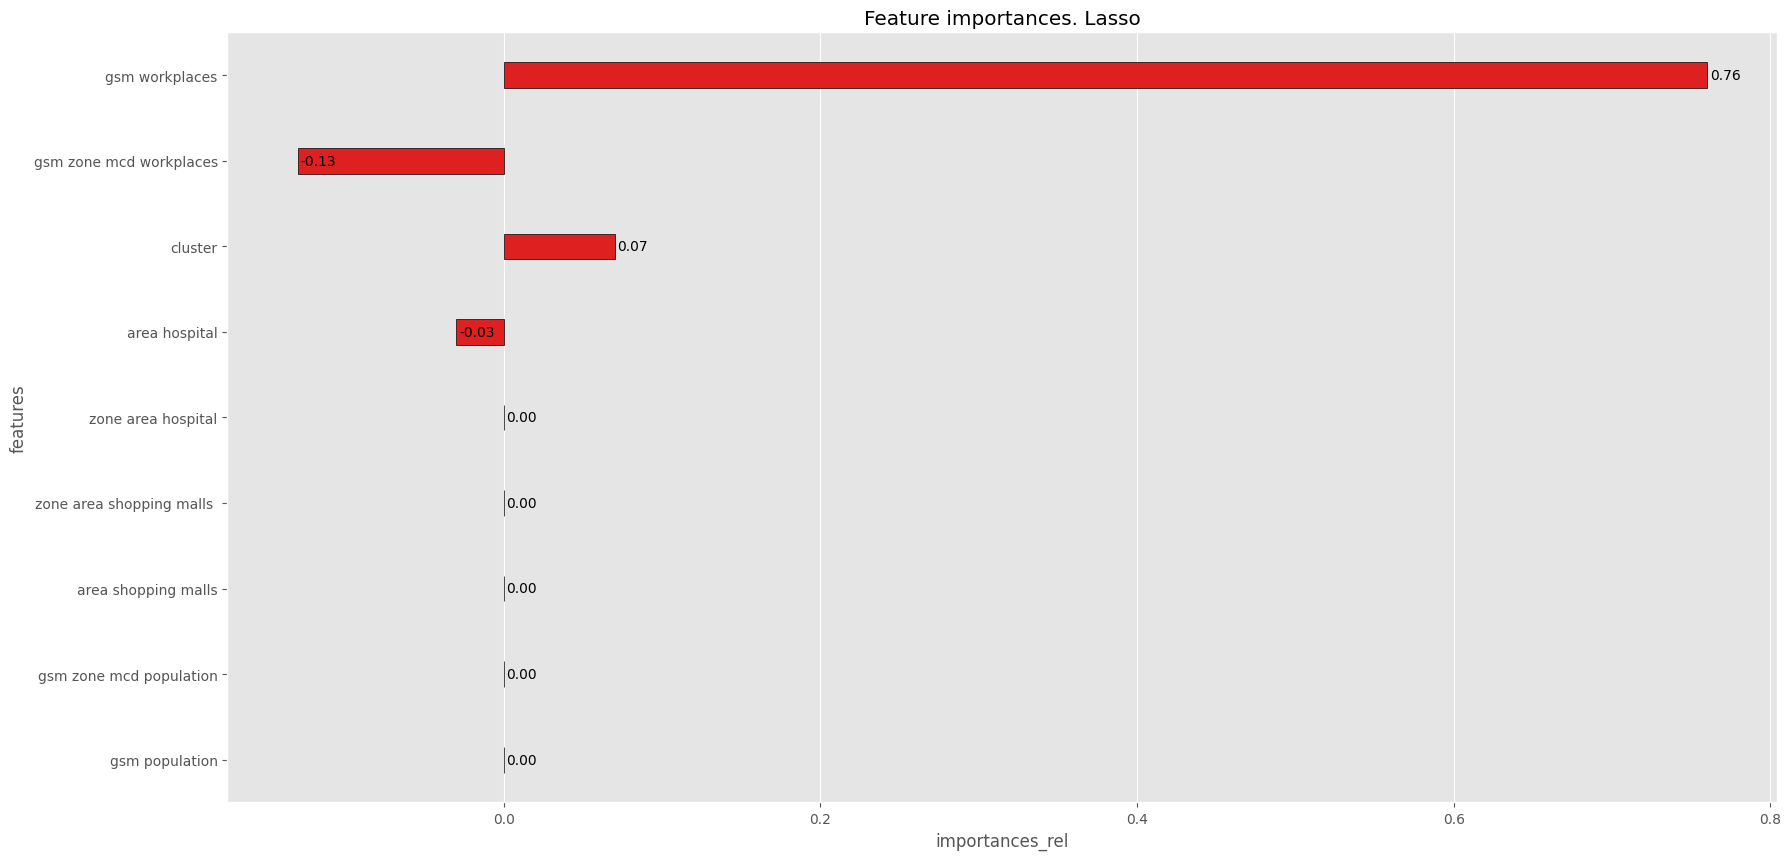

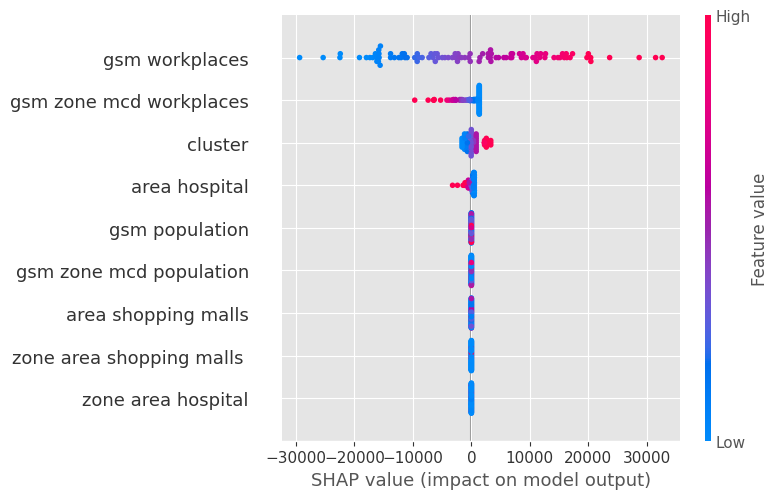

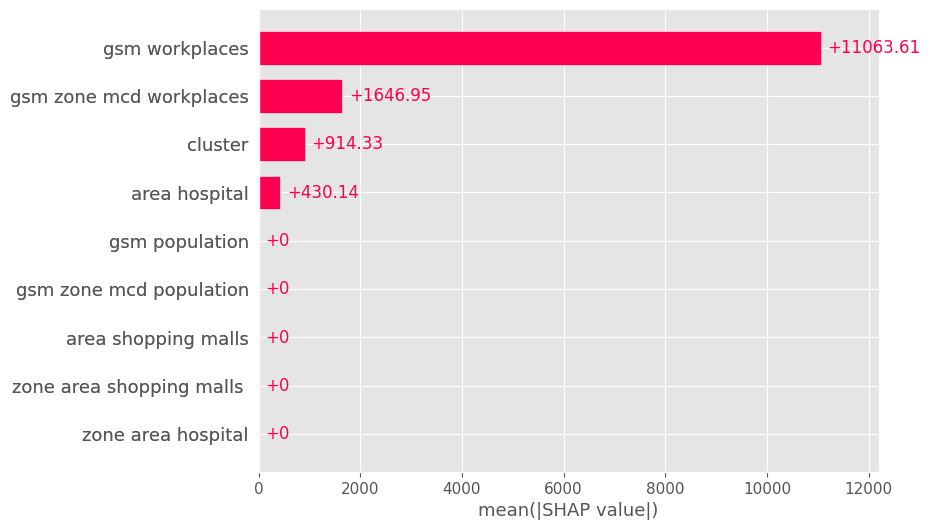

,features,importances,importances_rel
0,gsm workplaces,13256.262,0.76
1,gsm zone mcd workplaces,-2262.188,-0.13
2,cluster,1236.012,0.07
3,area hospital,-604.299,-0.03
4,zone area hospital,0.000,0.00
5,zone area shopping malls,0.000,0.00
6,area shopping malls,0.000,0.00
7,gsm zone mcd population,-0.000,-0.00
8,gsm population,0.000,0.00


In [21]:
model_train.get_importances_barplot(X=train_std_data['X_train_std_1'],
                                    model=Lasso_result_dict['model'],
                                    model_name="Lasso",
                                    save_dir='models/std',
                                    show_shap=True)

___
### <a id=5>save_data</a>

In [22]:
model_save = {'Lasso_std_1': Lasso_result_dict['model']}
utils_io.save_data(file_dict=model_save,
                   sub_dir='std',
                   directory='models')

Файл models\std\Lasso_std_1.pkl успешно сохранён.


___
### <a id=5>mlflow_save_results</a>

In [22]:
UNIQUE_EXP_NAME = "test"

tune_results = {"ElasticNet": EN_result_dict,
                "Quantile": Quant_result_dict,
                "XGB": XGB_result_dict}

model_tune.mlflow_save_results(X=train_std_data['X_train_std_1'],
                                y=train_std_data['target_train_1'],
                                optim_results=tune_results,
                                data_name=UNIQUE_EXP_NAME)

Логи MLFlow из БД postgres удалены!
Сервер MLFlow запущен...


🏃 View run ElasticNet_test at: http://127.0.0.1:5000/#/experiments/499/runs/525bd0d1fc4244c5a36d652ed7c40b4b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/499


🏃 View run Quantile_test at: http://127.0.0.1:5000/#/experiments/499/runs/579b752ad36442269551def64a14923d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/499


🏃 View run XGB_test at: http://127.0.0.1:5000/#/experiments/499/runs/4abf0649ba844eb5ae17637eecf0ebdd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/499
🏃 View run test_run at: http://127.0.0.1:5000/#/experiments/499/runs/12d6ea306eae452ab98fae4528ae31ae
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/499
